# Исследовательский анализ данных в Python и проверка гипотез
- Автор: Дарья Атлина
- Дата: 02.06.2025

## Цели и задачи проекта
**Цель проекта:** изучение и сравнение распределения заказов по сегментам и их сезонных изменений, осенней активности пользователей, а также популярных событий и партнёров.

**Задачи проекта:**
- Загрузка данных и знакомство с ними;
- Предобработка данных и подготовка их к исследованию;
- Исследовательский анализ данных:
    - анализ распределения заказов по сегментам и их сезонные изменения;
    - осенняя активность пользователей;
    - популярные события и партнёры;
- Статистический анализ данных;
- Общий вывод и рекомендации.

## Описание данных

В данном проекте мы будем работать с тремя датасетами:
- `final_tickets_orders_df.csv` включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. 

- `final_tickets_events_df.csv` содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия.

- `final_tickets_tenge_df.csv` с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге.

Таблица `final_tickets_orders_df.csv`
- `order_id` — уникальный идентификатор заказа.
- `user_id` — уникальный идентификатор пользователя.
- `created_dt_msk` — дата создания заказа (московское время).
- `created_ts_msk` — дата и время создания заказа (московское время).
- `event_id` — идентификатор мероприятия из таблицы events.
- `cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
- `age_limit` — возрастное ограничение мероприятия.
- `currency_code` — валюта оплаты, например rub для российских рублей.
- `device_type_canonical` — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных;
- `revenue` — выручка от заказа.
- `service_name` — название билетного оператора.
- `tickets_count` — количество купленных билетов.
- `total` — общая сумма заказа.

Таблица `final_tickets_events_df.csv`
- `event_id` — уникальный идентификатор мероприятия.
- `event_name` — название мероприятия. Аналог поля event_name_code из исходной базы данных.
- `event_type_description` — описание типа мероприятия.
- `event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее.
- `organizers` — организаторы мероприятия.
- `region_name` — название региона.
- `city_name` — название города.
- `venue_id` — уникальный идентификатор площадки.
- `venue_name` — название площадки.
- `venue_address` — адрес площадки.

Таблица `final_tickets_tenge_df.csv`
- `nominal` — номинал (100 тенге);
- `data` — дата;
- `curs` — курс тенге к рублю;
- `cdx` — обозначение валюты (kzt).

## Содержимое проекта
1. Загрузка данных и знакомство с ними.
2. Предобработка данных и подготовка их к исследованию.
3. Исследовательский анализ данных:
    - анализ распределения заказов по сегментам и их сезонные изменения;
    - осенняя активность пользователей;
    - популярные события и партнёры.
4. Статистический анализ данных;
5. Общий вывод и рекомендации.

## 1. Загрузка данных и знакомство с ними

Для начала импортируем все необходимые для проекта библиотеки и сохраним таблицы в датафреймы.

In [1]:
# импортируем библиотеку pandas
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from scipy.stats import mannwhitneyu

In [2]:
# сохраняем таблицу
tickets_orders_df = pd.read_csv('final_tickets_orders_df.csv',parse_dates=['created_dt_msk','created_ts_msk'])

# выводим первые 5 строк таблицы
tickets_orders_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [3]:
# выводим основную информацию о таблице
tickets_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               290849 non-null  int64         
 1   user_id                290849 non-null  object        
 2   created_dt_msk         290849 non-null  datetime64[ns]
 3   created_ts_msk         290849 non-null  datetime64[ns]
 4   event_id               290849 non-null  int64         
 5   cinema_circuit         290849 non-null  object        
 6   age_limit              290849 non-null  int64         
 7   currency_code          290849 non-null  object        
 8   device_type_canonical  290849 non-null  object        
 9   revenue                290849 non-null  float64       
 10  service_name           290849 non-null  object        
 11  tickets_count          290849 non-null  int64         
 12  total                  290849 non-null  floa

Датафрейм состоит из 14 столбцов и 290 849 строк.
- Столбцы `order_id`, `event_id`, `age_limit`, `revenue`, `tickets_count`, `total` и `days_since_prev` содержат числовые данные, 4 из которых содержат целочисленные данные типа `int64`, и 3 содержат числа с плавающей точкой типа `float64`.
- Столбцы `created_dt_msk` и `created_ts_msk` содержат данные даты и времени и имеют тип данных `dstetime64`.
- Столбцы `user_id`, `cinema_circuit`, `currency_code`, `device_type_canonical` и `service_name` содержат в себе текстовые данные и имеют тип данных `object`.
- Пропуски содержатся только в столбце `days_since_prev`, но они имеют логичное объяснение (если покупки не было, то данные содержат пропуск).

Таким образом, данные таблицы достаточно полные и информативные, все поля имеют подходящие типы данных, однако для полей с количественными данными возможно понизить разрядность.

In [4]:
# сохраняем таблицу
tickets_events_df = pd.read_csv('final_tickets_events_df.csv')

# выводим первые 5 строк таблицы
tickets_events_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [5]:
tickets_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


Датафрейм состоит из 11 столбцов и 22 427 строк.

- Столбцы `event_id`, `city_id` и `venue_id` имеют тип данных `int64` и содержат соответственно целочисленные значения.
- Остальные столбцы имеют тип данных `object` и содержат текстовые данные.
- Пропуски в данных отсутствуют.

Таким образом, данные таблицы достаточно полные и информативные, все поля имеют подходящие типы данных, однако для полей с количественными данными возможно понизить разрядность.

In [6]:
# сохраняем таблицу
tickets_tenge_df = pd.read_csv('final_tickets_tenge_df.csv',parse_dates=['data'])

# выводим первые 5 строк таблицы
tickets_tenge_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [7]:
tickets_tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int64         
 2   curs     357 non-null    float64       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.3+ KB


Датафрейм состоит из 4 столбцов и 357 строк.

- Столбец `data` имеет тип данных `datetime64` и содержит данные даты.
- Столбец `nominal` имеет тип данных `int64` и содержит целочисленные значения.
- Столбец `curs` имеет тип данных `float64` и содержит числа с плавающей точкой.
- Столбец `cdx` имеет тип данных `object` и содержит текстовые данные.
- Пропуски в данных отсутствуют.

Таким образом, данные таблицы достаточно полные и информативные, все поля имеют подходящие типы данных, однако для полей с количественными данными возможно понизить разрядность.

Первичное знакомство показывает, что данные хорошего качества — в них не большое количество пропущенных значений, а сами данные соответствуют описанию и выглядят корректными. 

У всех типов полей, которые содержат количественные данные, можно понизить разрядность до оптимальной. Этим мы зайдёмся в разделе предобработки данных.


Настало время следующего этапа — предобработки данных и подготовки их к исследованию.

---

## 2. Предобработка данных
### 2.1. Проверка на пропуски

Как и обговаривалось ранее, столбцы всех таблиц, за исключением столбца `days_since_prev`, не содержат пропусков.



### 2.2. Предварительное исследование

Теперь изучим значения в ключевых столбцах и проверим их на ошибки. Начнём с категориальных данных. Выведем на экран уникальные значения таких столбцов:

In [8]:
tickets_orders_df['currency_code'].unique()

array(['rub', 'kzt'], dtype=object)

Столбец с названиями валют содержит только значения `rub` и `kzt`, что является корректным. 

Проверим столбец `device_type_canonical`:

In [9]:
tickets_orders_df['device_type_canonical'].unique()

array(['mobile', 'desktop'], dtype=object)

Столбец `device_type_canonical`, как и заявлялось в задании, содержит только 2 значения, соответсвующих мобильному телефону и ПК. 

Проверим столбец `event_type_description`:

In [10]:
tickets_events_df['event_type_description'].unique()

array(['спектакль', 'балет', 'мюзикл', 'опера', 'концерт', 'шоу', 'ёлка',
       'цирковое шоу', 'событие', 'фестиваль', 'спортивное мероприятие',
       'выставка', 'спорт', 'оперетта', 'экскурсия', 'рок-мюзикл',
       'музыкальный спектакль', 'снегурочка', 'подарок',
       'кукольный спектакль'], dtype=object)

Все описания типов мероприятия указаны в нижнем регистре, оставим их без изменений.

Проверим столбец `event_type_main`:

In [11]:
tickets_events_df['event_type_main'].unique()

array(['театр', 'концерты', 'ёлки', 'другое', 'стендап', 'выставки',
       'спорт'], dtype=object)

Все типы мероприятий также указаны в нижнем регистре, мы их оставляем без изменений.

Проверим столбец `organizers`:

In [12]:
tickets_events_df['organizers'].unique()

array(['№4893', '№1931', '№4896', ..., '№4817', '№5105', '№4552'],
      dtype=object)

В поле с организаторами мероприятия `organizers` указаны их номера со знаком "№". И так понятно, что это номера организаторов мероприятия, поэтому можем избавиться от этого префикса.

In [13]:
# Уберём символ "№"
tickets_events_df['organizers'] = tickets_events_df['organizers'].str.replace('№', '', regex = False)

tickets_events_df['organizers'].unique()

array(['4893', '1931', '4896', ..., '4817', '5105', '4552'], dtype=object)



Перейдём к проверке количественных значений из таблицы `tickets_orders_df`. Построим распределение и диаграмму размаха для столбцов `revenue` и `tickets_count`:

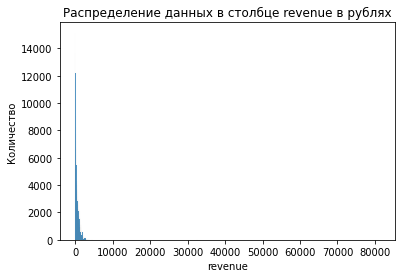

In [14]:
# Построим распределение данных для столбца `revenue`
sns.histplot(data=tickets_orders_df[tickets_orders_df['currency_code']=='rub'], x='revenue')

# Подписываем и отображаем график
plt.title('Распределение данных в столбце revenue в рублях')
plt.ylabel('Количество')
plt.show()

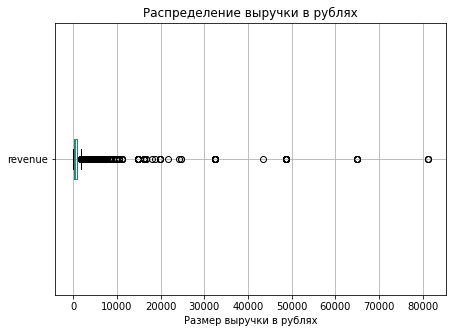

In [15]:
# Строим диаграмму размаха методом boxplot()
boxplot = tickets_orders_df[tickets_orders_df['currency_code']=='rub'].boxplot(column='revenue',
                     vert=False, 
                     figsize=(7, 5))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение выручки в рублях')
boxplot.set_xlabel('Размер выручки в рублях')

plt.show()

По гистограмме и ящику с усами мы видим, что данные выручки в рублях имеют очень длинный правый хвост. С такими данными будет тяжело работать из-за большого количества выбросов. Поэтому ограничим наши данные с выручкой в рублях 99-м процентилем.

In [16]:
# Выведем статистические показатели выручки в рублях
print('Статистические показатели столбца revenue в рублях:')
tickets_orders_df[tickets_orders_df['currency_code']=='rub']['revenue'].describe()

Статистические показатели столбца revenue в рублях:


count    285780.000000
mean        547.568333
std         871.524559
min         -90.760000
25%         113.827500
50%         346.100000
75%         791.700000
max       81174.540000
Name: revenue, dtype: float64

- Данные столбца `revenue` в рублях имеют довольно высокие выбросы, о чем нам говорит сильный размах между максимальным значением и 75 процентилем, а также высокое стандартное отклонение. Поэтому ограничим наш столбец 99-м процентилем.
- Также по статистическим покаателям мы можем заметить, что данные имеют отрицательные показатели выручки, что является ошибкой, которую нам необходимо исправить.

In [17]:
# Найдём 99-й процентиль
outliers = tickets_orders_df[tickets_orders_df['currency_code']=='rub']['revenue'].quantile(0.99)

display(f'99-ый процентиль по выручке до фильтрации в рублях = {outliers}')

# Отфильтруем данные, оставив значения меньше найденного порога выбросов и больше 0
tickets_orders_rub = tickets_orders_df.loc[(tickets_orders_df['currency_code']=='rub')&(tickets_orders_df['revenue'] < outliers)&(tickets_orders_df['revenue']>0)]

# Выводим результат describe() после фильтрации данных
print(tickets_orders_rub['revenue'].describe())

'99-ый процентиль по выручке до фильтрации в рублях = 2569.5942000000005'

count    276810.000000
mean        521.230877
std         499.762413
min           0.020000
25%         123.305000
50%         355.310000
75%         788.900000
max        2569.590000
Name: revenue, dtype: float64


Теперь проведём аналогичную проверку выручки в тенге:

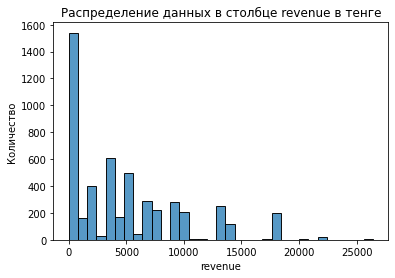

In [18]:
# Построим распределение данных для столбца `revenue`
sns.histplot(data=tickets_orders_df[tickets_orders_df['currency_code']=='kzt'], x='revenue')

# Подписываем и отображаем график
plt.title('Распределение данных в столбце revenue в тенге')
plt.ylabel('Количество')
plt.show()

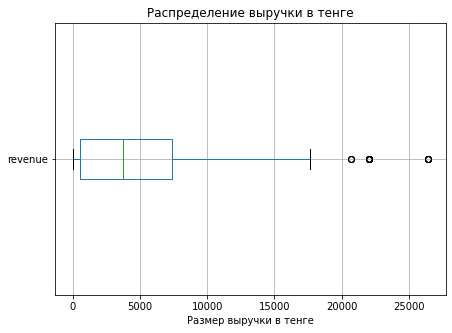

In [19]:
# Строим диаграмму размаха методом boxplot()
boxplot = tickets_orders_df[tickets_orders_df['currency_code']=='kzt'].boxplot(column='revenue',
                     vert=False, 
                     figsize=(7, 5))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение выручки в тенге')
boxplot.set_xlabel('Размер выручки в тенге')

plt.show()

По гистограмме и ящику с усами мы видим, что данные выручки в тенге имеют длинный правый хвост. Поэтому ограничим наши данные с выручкой в тенге аналогично 99-м процентилем.

In [20]:
# Выведем статистические показатели выручки в тенге
print('Статистические показатели столбца revenue в тенге:')
tickets_orders_df[tickets_orders_df['currency_code']=='kzt']['revenue'].describe()

Статистические показатели столбца revenue в тенге:


count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

- Данные столбца `revenue` в тенге имеют довольно высокие выбросы, о чем нам говорит сильный размах между максимальным значением и 75 процентилем, а также высокое стандартное отклонение. Поэтому ограничим наш столбец 99-м процентилем.

In [21]:
# Найдём 99-й процентиль
outliers = tickets_orders_df[tickets_orders_df['currency_code']=='kzt']['revenue'].quantile(0.99)

display(f'99-ый процентиль по выручке до фильтрации в тенге = {outliers}')

# Отфильтруем данные, оставив значения меньше найденного порога выбросов
tickets_orders_kzt = tickets_orders_df.loc[(tickets_orders_df['currency_code']=='kzt')&(tickets_orders_df['revenue'] < outliers)]

# Выводим результат describe() после фильтрации данных
print(tickets_orders_kzt['revenue'].describe())

'99-ый процентиль по выручке до фильтрации в тенге = 17617.24'

count     4844.000000
mean      4378.842494
std       4072.645224
min          0.000000
25%        486.030000
50%       3698.830000
75%       7076.240000
max      17230.320000
Name: revenue, dtype: float64


Теперь наши данные в столбце `revenue` нормализованы и мы можем объединить полученные датафреймы `tickets_orders_rub` и `tickets_orders_kzt` с помощью метода `concat` в один датафрейм `to_df`:

In [22]:
to_df = pd.concat([tickets_orders_rub, tickets_orders_kzt], ignore_index=True)

#Выведем информацию о отфильтрованном датафрейме
to_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281654 entries, 0 to 281653
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               281654 non-null  int64         
 1   user_id                281654 non-null  object        
 2   created_dt_msk         281654 non-null  datetime64[ns]
 3   created_ts_msk         281654 non-null  datetime64[ns]
 4   event_id               281654 non-null  int64         
 5   cinema_circuit         281654 non-null  object        
 6   age_limit              281654 non-null  int64         
 7   currency_code          281654 non-null  object        
 8   device_type_canonical  281654 non-null  object        
 9   revenue                281654 non-null  float64       
 10  service_name           281654 non-null  object        
 11  tickets_count          281654 non-null  int64         
 12  total                  281654 non-null  floa

In [23]:
display(f'Удалено {tickets_orders_df.shape[0]-to_df.shape[0]} строк с выбросами в поле с выручкой')

'Удалено 9195 строк с выбросами в поле с выручкой'

Таким образом, после фильтрации мы удалили 11 967 строк в поле с выручкой и можем переходить к изучению данных в столбце `tickets_count`:

In [24]:
# Выведем статистические показатели кол-ва билетов
print('Статистические показатели столбца tickets_count:')
to_df['tickets_count'].describe()

Статистические показатели столбца tickets_count:


count    281654.000000
mean          2.742688
std           1.156488
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          47.000000
Name: tickets_count, dtype: float64

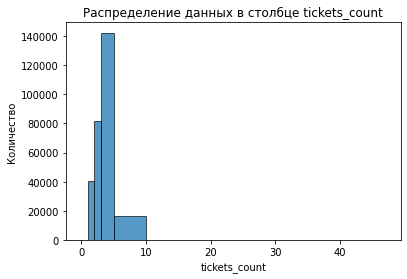

In [25]:
# Задаем границы бинов вручную
max_bin = to_df['tickets_count'].max()
# Построим распределение данных для столбца `tickets_count`
sns.histplot(data=to_df, x='tickets_count', bins=[0, 1, 2, 3, 5, 10, 25, max_bin])

# Подписываем и отображаем график
plt.title('Распределение данных в столбце tickets_count')
plt.ylabel('Количество')
plt.show()

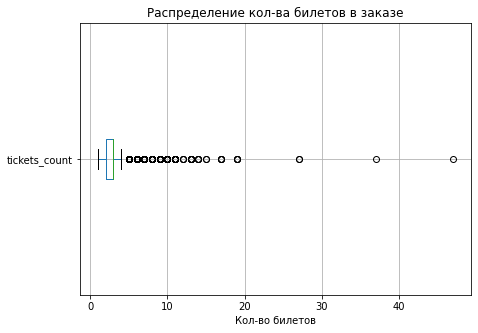

In [26]:
# Строим диаграмму размаха методом boxplot()
boxplot = to_df.boxplot(column='tickets_count',
                     vert=False, 
                     figsize=(7, 5))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение кол-ва билетов в заказе')
boxplot.set_xlabel('Кол-во билетов')

plt.show()

По графикам столбца `tickets_count` видим, что данные имеют распределение, стремящееся к нормальному, также имеются выбросы, которые мы учтём при выборе статистического теста.

Таким образом, мы провели предварительное исследование распределения данных в ключевых столбцах, изучили их распределение и совершили следующие действия:

- Ограничили данные с выручкой в рублях и тенге 99-м процентилем, так как данные имели очень высокие выбросы.
- Рассмотрели распределение и статистические показатели данных с количеством билетов.

Теперь можем переходить к проверке данных на дубликаты.

### 2.3. Проверка на дубликаты

Начнем с проверки данных на явные дубликаты.

In [27]:
# Найдём количество дубликатов
count_dupl = to_df.duplicated().sum()
display(f'В датафрейме to_df найдено {count_dupl} дубликатов')

'В датафрейме to_df найдено 0 дубликатов'

In [28]:
# Найдём количество дубликатов
count_dupl = tickets_events_df.duplicated().sum()
display(f'В таблице tickets_events_df найдено {count_dupl} дубликатов')

'В таблице tickets_events_df найдено 0 дубликатов'

In [29]:
# Найдём количество дубликатов
count_dupl = tickets_tenge_df.duplicated().sum()
display(f'В таблице tickets_tenge_df найдено {count_dupl} дубликатов')

'В таблице tickets_tenge_df найдено 0 дубликатов'

Мы убедились в отсутствии явных дубликатов в наших данных, но могли остаться неявные дубликаты. Проверим данные на наличие неявных дубликатов:

In [30]:
subset_columns = [col for col in to_df.columns if col != 'order_id']

# Ищем дубликаты, учитывая только указанные столбцы
duplicates = to_df.duplicated(subset=subset_columns).sum()
count = to_df.shape[0]
display(f'Общее количество строк в датафрейме to_df равно {count}')

display(f'Найдено {duplicates} неявных дубликатов')

'Общее количество строк в датафрейме to_df равно 281654'

'Найдено 29 неявных дубликатов'

Мы нашли 29 неявных дубликатов по бронированию билета без учёта идентификаторов заказа в датафрейме to_df. Так как данные имеют 270+ тыс строк, можем избавиться от неявных дубликатов без потери качества данных, оставив только первые вхождения дублирующихся строк.

In [31]:
to_df_deduplicated = to_df.drop_duplicates(subset=subset_columns, keep='first') # keep='first' оставляет первое вхождение

Проверим также датафрейм `tickets_events_df` на наличие неявных дубликатов:

In [32]:
subset_columns = [col for col in tickets_events_df.columns if col != 'event_id']

# Ищем дубликаты, учитывая только указанные столбцы
duplicates = tickets_events_df.duplicated(subset=subset_columns).sum()
count = tickets_events_df.shape[0]
display(f'Общее количество строк в датафрейме tickets_events_df равно {count}')

display(f'Найдено {duplicates} неявных дубликатов')

'Общее количество строк в датафрейме tickets_events_df равно 22427'

'Найдено 871 неявных дубликатов'

Мы проверили данные на наличие явных и неявных дубликатов и получили следующие результаты:
- Явные дубликаты в данных отсутствуют.
- В датафрейме `to_df` найдено 29 неявных дубликатов, которые мы удалили, так как их количество несоизмеримо мало с общим количеством строк. А также невозможна ситуация, при которой будут существовать заказы с разными идентификаторами, но созданные в одно и то же время.
- В датафрейме `tickets_events_df` найдено 871 неявных дубликатов, которые мы оставили, так как одно и то же мероприятие могло повторяться с некоторой периодичностью на одной и той же площадке с теми же организаторами.

### 2.4. Преобразование типов данных

Изначально при чтении таблиц в наши датафреймы мы учли, что есть столбцы, которые содержат данные даты и времени. Поэтому сразу при чтении файлов мы смогли преобразовать их к типу `datetime`. Однако у нас остались столбцы с количественными данными, размерность которых мы можем понизить, или же совсем изменить тип данных. Перейдём к оптимизации типов данных.

Снизим размерность для количественных столбцов.

In [33]:
to_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281654 entries, 0 to 281653
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               281654 non-null  int64         
 1   user_id                281654 non-null  object        
 2   created_dt_msk         281654 non-null  datetime64[ns]
 3   created_ts_msk         281654 non-null  datetime64[ns]
 4   event_id               281654 non-null  int64         
 5   cinema_circuit         281654 non-null  object        
 6   age_limit              281654 non-null  int64         
 7   currency_code          281654 non-null  object        
 8   device_type_canonical  281654 non-null  object        
 9   revenue                281654 non-null  float64       
 10  service_name           281654 non-null  object        
 11  tickets_count          281654 non-null  int64         
 12  total                  281654 non-null  floa

In [34]:
for i in ['order_id', 'event_id', 'age_limit', 'tickets_count']:
    to_df[i] = pd.to_numeric(to_df[i],downcast='integer')

for i in ['revenue', 'total', 'days_since_prev']:
    to_df[i] = pd.to_numeric(to_df[i],downcast='float')

to_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281654 entries, 0 to 281653
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               281654 non-null  int32         
 1   user_id                281654 non-null  object        
 2   created_dt_msk         281654 non-null  datetime64[ns]
 3   created_ts_msk         281654 non-null  datetime64[ns]
 4   event_id               281654 non-null  int32         
 5   cinema_circuit         281654 non-null  object        
 6   age_limit              281654 non-null  int8          
 7   currency_code          281654 non-null  object        
 8   device_type_canonical  281654 non-null  object        
 9   revenue                281654 non-null  float32       
 10  service_name           281654 non-null  object        
 11  tickets_count          281654 non-null  int8          
 12  total                  281654 non-null  floa

Мы снизили разрядность количественных столбцов в датафрейме `to_df`. Теперь проведём ту же самую процедуру для датафрейма tickets_events_df.

In [35]:
tickets_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [36]:
for i in ['event_id', 'organizers', 'city_id', 'venue_id']:
    tickets_events_df[i] = pd.to_numeric(tickets_events_df[i],downcast='integer')

tickets_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int32 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  int16 
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int32 
 8   venue_id                22427 non-null  int16 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int16(2), int32(2), object(7)
memory usage: 1.5+ MB


Мы снизили разрядность для количественных столбцов датафрейма `tickets_events_df`. Аналогично сделаем и для датафрейма `tickets_tenge_df`.

In [37]:
tickets_tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int64         
 2   curs     357 non-null    float64       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [38]:
tickets_tenge_df['nominal'] = pd.to_numeric(tickets_tenge_df['nominal'],downcast='integer')
tickets_tenge_df['curs'] = pd.to_numeric(tickets_tenge_df['curs'],downcast='float')

tickets_tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int8          
 2   curs     357 non-null    float32       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float32(1), int8(1), object(1)
memory usage: 7.4+ KB


Таким образом, мы понизили разрядость с `int64` и `float64` до оптимально необходимых `int8`, `int16`, `int32` и `float32` у всех количественных столбцов трёх имеющихся датафреймов.

Теперь мы можем переходить к объединению и дополнению датафреймов необходимыми полями.

### 2.5. Объединение и дополнение датафреймов

Начнём с объединения датафреймов. Объединим датафреймы `to_df` и `tickets_events_df` в один датафрейм `df_new`. Тип объединения будем использовать `inner` для того, чтобы избежать появления NaN значений. К полученному датафрейму присоединим датафрейм `tickets_tenge_df`.

In [39]:
df_new = to_df.merge(tickets_events_df, on='event_id')
df = df_new.merge(tickets_tenge_df, left_on='created_dt_msk', right_on='data')

df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.697201,kzt
1,6274963,44c1c640a242aea,2024-08-20,2024-08-20 22:12:04,237325,нет,0,rub,mobile,144.729996,...,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-08-20,100,18.697201,kzt
2,474528,2b1f730d7024681,2024-08-20,2024-08-20 15:29:56,373657,нет,18,rub,mobile,318.269989,...,Североярская область,Озёрск,2,1631,"Музей истории ""Воспоминание"" Групп","наб. Тамбовская, д. 1/4 к. 577",2024-08-20,100,18.697201,kzt
3,7477361,05ba93f1b1e1fdd,2024-08-20,2024-08-20 17:06:44,534657,нет,16,rub,mobile,339.609985,...,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",2024-08-20,100,18.697201,kzt
4,472150,3ee7dc2e115847f,2024-08-20,2024-08-20 02:57:22,534657,нет,16,rub,mobile,339.609985,...,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",2024-08-20,100,18.697201,kzt


Теперь мы можем переходить к добавлению необходимых полей. Начнём с поля `revenue_rub`:

In [40]:
df['revenue_rub'] = df.apply(
    lambda row: row['revenue'] if row['currency_code'] == 'rub' 
    else (row['revenue'] / row['nominal']) * row['curs'],
    axis = 1)

Теперь у нас есть столбец с выручкой полностью в рублях. Можем переходить к созданию нового поля `one_ticket_revenue_rub`:

In [41]:
df['one_ticket_revenue_rub'] = df.apply(
    lambda row: row['revenue_rub'] / row['tickets_count'],
    axis = 1)

Мы добавили ещё одно поле, которое содержит в себе выручку с продажи одного билета на мероприятие.

Создадим ещё одно расчётное поле. `month` - выделим месяц оформления заказа в отдельный столбец.

In [42]:
df['month'] = df['created_dt_msk'].dt.month

Теперь у нас есть столбец, который содержит месяц оформления заказа, и мы можем создать заключительное поле `season` с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.

In [43]:
# Функция для определения сезона
def get_season(month):
  if month in [12, 1, 2]:
    return 'зима'
  elif month in [3, 4, 5]:
    return 'весна'
  elif month in [6, 7, 8]:
    return 'лето'
  else:  # month in [9, 10, 11]
    return 'осень'

# Создаем столбец 'season'
df['season'] = df['month'].apply(get_season)

В ходе пункта 2.5 мы объединили три имеющихся датафрейма в один, а также добавили 4 новых столбца:
- `revenue_rub` - содержит значения выручки в российских рублях.
- `one_ticket_revenue_rub` - содержит выручку с продажи одного билета на мероприятие.
- `month` - содержит месяц оформления заказа.
- `season` - содержит информацию о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.

На этом предобработка данных окончена. В ходе предобработки мы:
- Проверили данные на пропуски и убедились в их отсутствии за исключением столбца `days_since_prev`.
- Проверили значения в ключевых столбцах: для количественных данных проверили наличие выбросов и ограничили поле с выручкой 99-м процентилем, а также проверили категориальные данные и убедились в их корректности.
- Проверили данные на явные и неявные дубликаты. Убедились в отсутствии явных дубликатов и избавились от неявных дубликатов.
- Провели преобразование типов данных, снизив разрядность полей с количественными данными до типов `int8`, `int16`, `int32` и `float32`.
- А также создали 4 новых поля для дальнейшего исследования.

Теперь мы можем переходить к исследовательскому анализу данных.

## 3. Исследовательский анализ данных
### 3.1. Анализ распределения заказов по сегментам и их сезонные изменения

Анализ дашборда показал, что в данных наблюдается сезонность — осенью количество заказов увеличивается. На стадии исследовательского анализа изучим изменение пользовательской активности или пользовательского интереса в связи с сезонностью. Проанализируем динамику по таким разрезам:
- тип мероприятия `event_type_main`;
- тип устройства `device_type_canonical`;
- категория мероприятий по возрастному рейтингу `age_limit`.

В этом разделе изучим распределение заказов по сегментам и их сезонные изменения, выполнив следующие шаги:
- **Для каждого месяца найдём количество заказов** и визуализируем результаты. Проверим, фиксируется ли увеличение заказов от июня к ноябрю 2024 года.
- **Для осеннего и летнего периодов сравним распределение заказов билетов** по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу. Результаты визуализируем подходящим графиком, который поможет сопоставить значения для летнего и осеннего сезонов.
- **Изучите изменение выручки с продажи одного билета** в зависимости от типа мероприятия летом и осенью. Видна ли динамика средней стоимости билета в разрезе разных категорий мероприятий? Для каждого типа мероприятия рассчитаем среднее значение выручки с одного билета, затем найдём относительное изменение осенних значений по сравнению с летними. Результат сопроводим подходящей визуализацией.
- **Сделаем вывод** о том, как меняется распределение заказов в каждой категории с наступлением осени. Было ли изменение средней стоимости одного билета в разрезе разных типов мероприятий?

In [44]:
pivot_month = pd.pivot_table(df,
                             index="month",
                             values="order_id",
                             aggfunc="count")
display(pivot_month)

,order_id
month,
6,32715
7,37882
8,43172
9,68862
10,98996


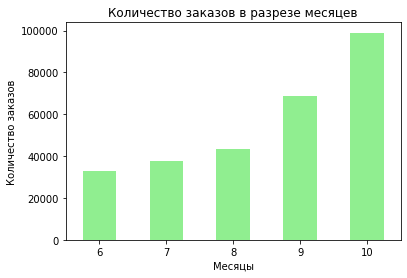

In [45]:
pivot_month.plot(kind='bar',
                 title='Количество заказов в разрезе месяцев',
                 legend=False,
                 ylabel='Количество заказов',
                 xlabel='Месяцы',
                 rot=0,
                 color='lightgreen');

Мы построили сводную таблицу, в которой для каждого месяца рассчитали количество заказов. Для визуализации мы выбрали столбчатую диаграмму. На ней можно отследить положительную динамику: от июня к октябрю количество заказов стабильно увеличивается.

Для осеннего и летнего периодов сравним распределение заказов. Для начала посмотрим на распределение в разрезе типа мероприятия:

In [46]:
pivot_seasons_event = pd.pivot_table(df,
                             index="event_type_main",
                             columns="season",
                             values="order_id",
                             aggfunc="count")

pivot_seasons_event = pivot_seasons_event.div(pivot_seasons_event.sum(axis=0), axis=1)  # axis=0: суммируем по строкам, axis=1: делим по столбцам

display(pivot_seasons_event.sort_values(by='лето', ascending=False))

season,лето,осень
event_type_main,,
концерты,0.437606,0.373387
другое,0.250428,0.194641
театр,0.208343,0.254447
стендап,0.055780,0.041243
спорт,0.024277,0.111898
выставки,0.021166,0.014310
ёлки,0.002400,0.010074


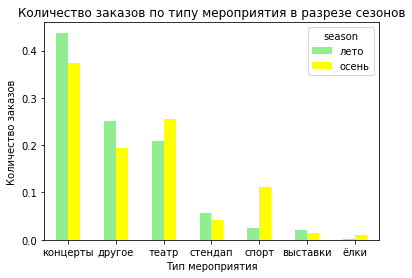

In [47]:
pivot_seasons_event.sort_values(by='лето', ascending=False).plot(kind='bar',
                 title='Количество заказов по типу мероприятия в разрезе сезонов',
                 #legend=False,
                 ylabel='Количество заказов',
                 xlabel='Тип мероприятия',
                 rot=0,
                 color=['lightgreen','yellow']);

По графику мы видим, что не все типы мероприятий имеют положительный тренд количества заказов с наступлением осени. Так, например, доля заказов для концертов, стендапов, выставок и других мероприятий летом выше, чем осенью. А вот для театров, спорта и ёлок мы наблюдаем положительную тенденцию (увеличение доли количества заказов от лета к осени).

Рассмотрим теперь распределение заказов билетов по типам устройств:

In [48]:
pivot_seasons_device = pd.pivot_table(df,
                             index="device_type_canonical",
                             columns="season",
                             values="order_id",
                             aggfunc="count")

pivot_seasons_device = pivot_seasons_device.div(pivot_seasons_device.sum(axis=0), axis=1)  # axis=0: суммируем по строкам, axis=1: делим по столбцам

display(pivot_seasons_device.sort_values(by='лето', ascending=False))

season,лето,осень
device_type_canonical,,
mobile,0.809289,0.796036
desktop,0.190711,0.203964


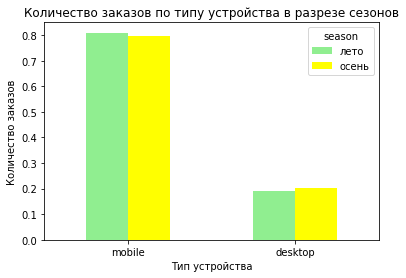

In [49]:
pivot_seasons_device.sort_values(by='лето', ascending=False).plot(kind='bar',
                 title='Количество заказов по типу устройства в разрезе сезонов',
                 #legend=False,
                 ylabel='Количество заказов',
                 xlabel='Тип устройства',
                 rot=0,
                 color=['lightgreen','yellow']);

Для типов устройств же мы видим, что сезон практически никак не влияет на долю количества заказов. Для заказов, сделанных с мобильных устройств осенью мы наблюдаем незначительное снижение доли количества заказов по сравнению с летом, а для ПК - наоборот, с наступлением осени мы видим незначительное увеличение доли заказов.

И аналогично рассмотрим распределение доли заказов в разрезе категорий мероприятий по возрастному рейтингу для осеннего и летнего периодов:

In [50]:
pivot_seasons_age = pd.pivot_table(df,
                             index="age_limit",
                             columns="season",
                             values="order_id",
                             aggfunc="count")

pivot_seasons_age = pivot_seasons_age.div(pivot_seasons_age.sum(axis=0), axis=1)  # axis=0: суммируем по строкам, axis=1: делим по столбцам

display(pivot_seasons_age.sort_values(by='лето', ascending=False))

season,лето,осень
age_limit,,
16,0.284708,0.263354
12,0.210998,0.221485
6,0.183547,0.176602
0,0.181693,0.234073
18,0.139054,0.104487


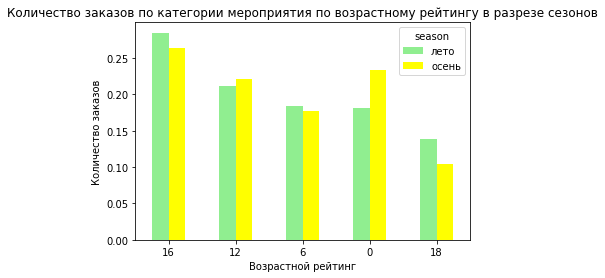

In [51]:
pivot_seasons_age.sort_values(by='лето', ascending=False).plot(kind='bar',
                 title='Количество заказов по категории мероприятия по возрастному рейтингу в разрезе сезонов',
                 #legend=False,
                 ylabel='Количество заказов',
                 xlabel='Возрастной рейтинг',
                 rot=0,
                 color=['lightgreen','yellow']);

Мы видим по графику, что положительный тренд от лета к осени по доле заказов имеют только категории `12` и `0`. Остальные же категории уменьшают свои доли заказов от лета к осени.

Перейдём теперь к изучению выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью. Для этого ранее мы создали столбец `one_ticket_revenue_rub`, которым воспользуемся:

In [52]:
pivot_seasons_tickets = pd.pivot_table(df,
                             index="event_type_main",
                             columns="season",
                             values="one_ticket_revenue_rub",
                             aggfunc="mean")

pivot_seasons_tickets['относительное изменение'] = (pivot_seasons_tickets['осень'] - pivot_seasons_tickets['лето']) / pivot_seasons_tickets['лето']*100

display(pivot_seasons_tickets.sort_values(by='лето', ascending=False))

season,лето,осень,относительное изменение
event_type_main,,,
концерты,307.329465,268.086554,-12.769004
ёлки,271.436177,229.585590,-15.418205
стендап,218.518107,231.124973,5.769255
театр,216.345727,176.070710,-18.616044
другое,88.002193,77.431362,-12.012009
выставки,86.716646,91.905092,5.983219
спорт,55.247119,50.238828,-9.065251


In [53]:
df.isna().sum()

order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21351
event_name                    0
event_type_description        0
event_type_main               0
organizers                    0
region_name                   0
city_name                     0
city_id                       0
venue_id                      0
venue_name                    0
venue_address                 0
data                          0
nominal                       0
curs                          0
cdx                           0
revenue_rub                   0
one_ticket_revenue_rub        0
month                         0
season  

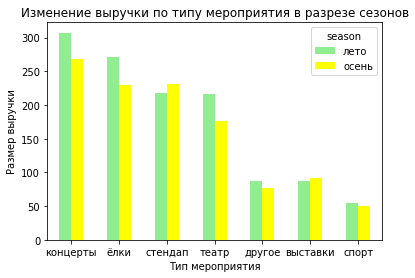

In [54]:
pivot_seasons_tickets.sort_values(by='лето', ascending=False).plot(kind='bar',
                 y=['лето','осень'],
                 title='Изменение выручки по типу мероприятия в разрезе сезонов',
                 ylabel='Размер выручки',
                 xlabel='Тип мероприятия',
                 rot=0,
                 color=['lightgreen','yellow']);

По сводной таблице мы видим, что только у 2 типов мероприятий из 7 выручка с продажи одного билета увеличилась с наступлением осени: для стендапа выручка выросла на 5,77%, а для выставок на 5,98%. Для всех остальных типов мероприятий мы наблюдаем снижение выручки на 9-18%. Самое больше изменение у типа мероприятий `театр`: выручка с продажи одного билета снизилась на 18,61%.

### 3.2. Осенняя активность пользователей

Изучим активность пользователей осенью 2024 года:
- Проанализируем динамику изменений по дням для:
    - общего числа заказов;
    - количества активных пользователей DAU;
    - среднего числа заказов на одного пользователя;
    - средней стоимости одного билета.
- Изучим недельную цикличность.

Снова создадим сводную таблицу, в которой посчитаем все необходимые поля.

In [55]:
pivot_days = pd.pivot_table(df[df['season']=='осень'],
                             index='created_dt_msk',
                             values=['order_id','user_id','one_ticket_revenue_rub'],
                             aggfunc={'order_id':'count','user_id':'nunique','one_ticket_revenue_rub':'mean'})

pivot_days['order_per_users'] = pivot_days['order_id']/pivot_days['user_id']

display(pivot_days.head())

,one_ticket_revenue_rub,order_id,user_id,order_per_users
created_dt_msk,,,,
2024-09-01,202.149068,1314,555,2.367568
2024-09-02,190.847823,1370,571,2.399299
2024-09-03,80.492606,5088,776,6.556701
2024-09-04,179.304223,1757,683,2.572474
2024-09-05,189.902317,1940,738,2.628726


Для изучения динамики построим линейные графики для каждого столбца отедльно.

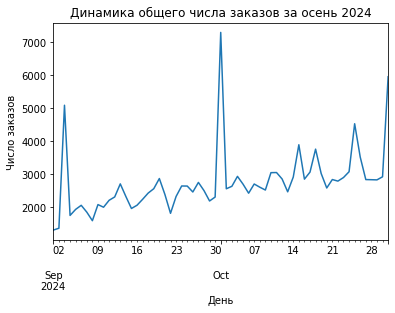

In [56]:
# Строим линейный график
pivot_days.plot(kind='line', y='order_id', legend=False)

# Настраиваем оси
plt.title('Динамика общего числа заказов за осень 2024')
plt.xlabel('День')
plt.ylabel('Число заказов')

plt.show()

По графику динамики общего числа заказов за осень 2024 г. мы видим, что были 3 дня с подорительно высокой активностью, когда общее количество заказов за день превышало 50 000. Возможно в эти дни проводились акции или были скидки на популярные товары. В целом, динамика от сентября к октябрю имеет положительный тренд.

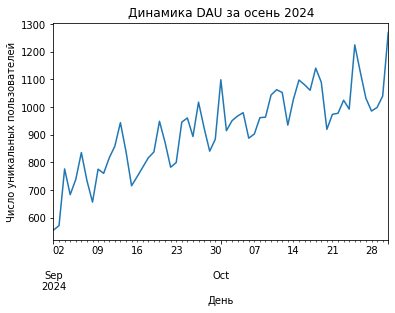

In [57]:
# Строим линейный график
pivot_days.plot(kind='line', y='user_id', legend=False)

# Настраиваем оси
plt.title('Динамика DAU за осень 2024')
plt.xlabel('День')
plt.ylabel('Число уникальных пользователей')

plt.show()

По графику динамики DAU за осень 2024 г. мы видим, что от сентября к октябрю количество уникальных пользователей растёт, хоть и скачкообразно. DAU от 01.09.2024 к 31.10.2024 выросло более чем на 700 пользователей, что является ещё одним подтверждением положительного тренда динамики DAU.

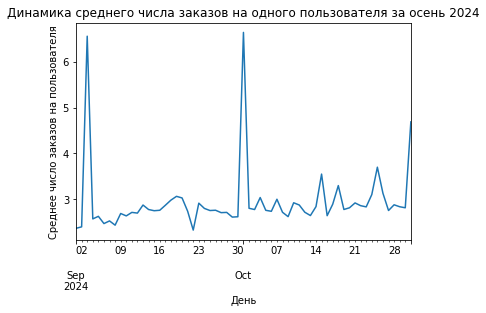

In [58]:
# Строим линейный график
pivot_days.plot(kind='line', y='order_per_users', legend=False)

# Настраиваем оси
plt.title('Динамика среднего числа заказов на одного пользователя за осень 2024')
plt.xlabel('День')
plt.ylabel('Среднее число заказов на пользователя')

plt.show()

По графику динамики среднего числа заказов на одного пользователя за осень 2024 г. мы видим, что были 3 дня с подорительно высокой активностью, и это те же дни, когда было самое большое количество заказов. Таким образом выбросы в графике среднего кол-ва заказов на одного пользователя находят объяснение. В целом, динамика от сентября к октябрю имеет положительный тренд.

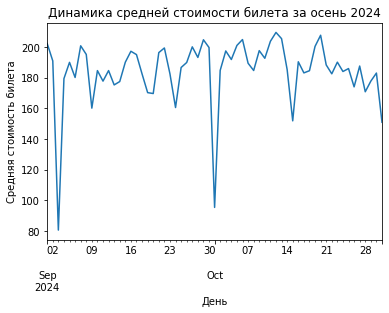

In [59]:
# Строим линейный график
pivot_days.plot(kind='line', y='one_ticket_revenue_rub', legend=False)

# Настраиваем оси
plt.title('Динамика средней стоимости билета за осень 2024')
plt.xlabel('День')
plt.ylabel('Средняя стоимость билета')

plt.show()

По графику динамики средней стоимости одного билета за осень 2024 года мы видим, что было 2 дня с сильным падением средней цены. Эти дни совпадают с днями, когда наблюдались большие выбросы в динамике общего количества заказов и среднего числа заказов на пользователя.

**Промежуточный вывод об осенней активности пользователей по дням.**

Таким образом, мы можем сделать вывод, что в начале и конце сентября были критически низкие цены на билеты, в связи с чем и возникла высокая активность пользователей, что привело к выбросам в динамике общего числа заказов и среднего числа заказов на пользователя соответственно.

---

Теперь перейдём к изучению недельной цикличности. Выделим из поля `created_dt_msk` номер дня недели и сравним пользовательскую активность в будни и выходные.

In [60]:
# Выделяем номер дня недели, где 0 - понедельник, 6 - воскресенье
df['day_of_week'] = df['created_dt_msk'].dt.day_of_week
# Добавим к значениям столбца 1, чтобы получить привычные номера дней недели
# 1 - понедельник, 7 - воскресенье
df['day_of_week'] = df['day_of_week'] + 1

In [61]:
pivot_day_of_week = pd.pivot_table(df[df['season']=='осень'],
                             index='day_of_week',
                             values='user_id',
                             aggfunc='nunique')

display(pivot_day_of_week)

,user_id
day_of_week,
1,4433
2,4784
3,4806
4,4961
5,4844
6,4524
7,4344


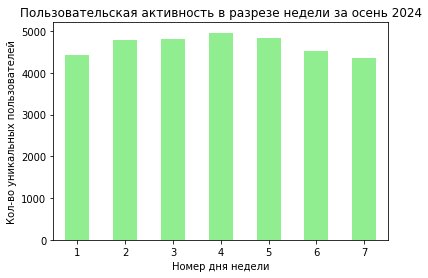

In [62]:
pivot_day_of_week.plot(kind='bar',
                       y='user_id',
                       title='Пользовательская активность в разрезе недели за осень 2024',
                       legend=False,
                       ylabel='Кол-во уникальных пользователей',
                       xlabel='Номер дня недели',
                       rot=0,
                       color='lightgreen');

По графику видим, что пользовательская активность растёт от понедельника (4 433 активных пользователя) к середине недели, в четверг наблюдается пик активности (4 961 пользователь), и на выходных активность пользователей уже снижается (в воскресенье 4 344 активных пользователя) и становится примерно равной понедльнику.

**Промежуточный вывод об осенней активности пользователей по будням и выходным.**

Таким образом, пользовательская активность в будни выше, чем в выходные, в чём мы дополнительно можем убедиться, посмотрев на таблицу pivot_day_of_week.

---

### 3.3. Популярные события и партнёры
После того как мы изучили изменение популярности событий и пользовательской активности осенью 2024 года, посмотрим, как события распределены по регионам и партнёрам. Это позволит выделить ключевые регионы и партнёров, которые вносят наибольший вклад в выручку.
- Для каждого **региона** посчитаем уникальное количество мероприятий и общее число заказов. Найдём, в каких регионах предлагается наибольшее разнообразие мероприятий.
- Для каждого **билетного партнёра** посчитаем общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов. Сконцентрируемся на наиболее активных партнёрах.

In [63]:
# Строим сводную таблицу по регионам
pivot_region = pd.pivot_table(df,
                             index='region_name',
                             values=['event_id','order_id'],
                             aggfunc={'event_id':'nunique','order_id':'count'})

# Вычисляем общее количество мероприятий (nunique event_id)
total_events = pivot_region['event_id'].sum()

# Добавляем столбец с долей мероприятий для каждого региона
pivot_region['share_events'] = (pivot_region['event_id'] / total_events) * 100 # Умножаем на 100, чтобы получить в процентах

# Сортируем по убыванию доли мероприятий
pivot_region = pivot_region.sort_values(by='share_events',ascending=False)

display(pivot_region.head())

,event_id,order_id,share_events
region_name,,,
Каменевский регион,5792,85406,26.317703
Североярская область,3777,43596,17.161941
Широковская область,1217,16087,5.529807
Светополянский округ,1059,7465,4.811887
Речиновская область,701,6266,3.185205


Мы получили сводную таблицу, в которой для каждого региона посчитали кол-во уникальных мероприятий и общее число заказов, а также нашли долю проводимых мероприятий от их общего числа. Также мы отсортировали регионы по полю с долей количества мероприятий от их общего числа в порядке убывания. 3 самых популярных по мероприятиям региона: Каменевский район с долей 26%, Североярская и Широковская области с долями 17 и 5% соответственно.

Теперь построим сводную таблицу для каждого билетного партнёра.

In [64]:
# Строим сводную таблицу по регионам
pivot_service = pd.pivot_table(df,
                             index='service_name',
                             values=['event_id','order_id','revenue'],
                             aggfunc={'event_id':'nunique','order_id':'nunique','revenue':'sum'})

# Вычисляем общее количество мероприятий (nunique event_id)
total_events = pivot_service['event_id'].sum()

# Добавляем столбец с долей мероприятий для каждого партнёра
pivot_service['share_events'] = (pivot_service['event_id'] / total_events) * 100 # Умножаем на 100, чтобы получить в процентах

# Сортируем по убыванию доли мероприятий
pivot_service = pivot_service.sort_values(by='share_events',ascending=False)

display(pivot_service.head())

,event_id,order_id,revenue,share_events
service_name,,,,
Лови билет!,4813,40507,16670699.00,20.025797
Билеты без проблем,4019,57848,26435412.00,16.722144
Билеты в руки,3486,39808,13195357.00,14.504452
Облачко,2335,26402,18588614.00,9.715403
Лучшие билеты,1741,17620,2721801.25,7.243904


Мы получили сводную таблицу, в которой для каждого билетного партнёра посчитали кол-во уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов, а также нашли долю проводимых мероприятий от их общего числа и провели сортировку по этому полю в порядке убывания. Самым популярным билетным партнёром стал "Лови билет!" с долей 20% мероприятий от их общего количества.

**Промежуточный вывод о популярных событиях и партнёрах.**

Для каждого региона мы посчитали уникальное кол-во мероприятий и общее число заказов, а также нашли долю проводимых мероприятий. С большим отрывом самым популярным регионом по доле проводимых мероприятий стал Каменевский район с долей в 26%. На втором месте стоит Североярская область с долей в 17%, а остальные регионы имеют долю мероприятий сильно меньше (5% и ниже).

Для каждого билетного партнёра мы посчитали число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов, и также долю проводимых мероприятий. Самым популярным партнёром стал "Лови билет" с долей в 20%. Вторым по популярности стал "Билеты без проблем" с долей в 16%, а третьим - "Билеты в руки". Остальные партнёры значительно менее популярны (доля проводимых мероприятий составляет 9% и ниже).


---

## 4. Статистический анализ данных.

Нам необходимо проверить две гипотезы, которые предполагают большую активность пользователей мобильных устройств:
- Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

Начнём с первой гипотезы. Для проверки нам необходимо сравнить размеры групп, их статистики и распределение. После попробуем статистически доказать гипотезу, используя одностороннюю проверку гипотезы с двумя выборками.

Нулевая гипотеза $H_0: \mu_{\text{моб}} \leq \mu_{\text{ПК}}$ <br> Среднее количество заказов на одного пользователя мобильного приложения не выше по сравнению с пользователями стационарных устройств.

Альтернативная гипотеза $H_1: \mu_{\text{моб}} > \mu_{\text{ПК}}$ <br> Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.

In [65]:
df_autumn = df[df['season']=='осень']

# Проверим пользователей на пересечение
df_mob = df_autumn[df_autumn['device_type_canonical']=='mobile']['user_id']
df_desk = df_autumn[df_autumn['device_type_canonical']=='desktop']['user_id']

intersection = list(set(df_mob)&set(df_desk))
display(len(intersection))

3234

Обнаружилось 3 234 пользователя, которые пользуются и мобильными устройствами и стационарными компьютерами. Для корректного проведения статистического анализа, необходимо чтобы группы не пересекались, поэтому исключим этих пользователей из наших данных.

In [66]:
df_clear = df_autumn[~df_autumn['user_id'].isin(intersection)]

In [67]:
# Сформируем выборки
group_A = df_clear[df_clear['device_type_canonical'] == 'mobile'].groupby('user_id')['order_id'].count().reset_index()
group_B = df_clear[df_clear['device_type_canonical'] == 'desktop'].groupby('user_id')['order_id'].count().reset_index()

Проверим размеры наших выборок:

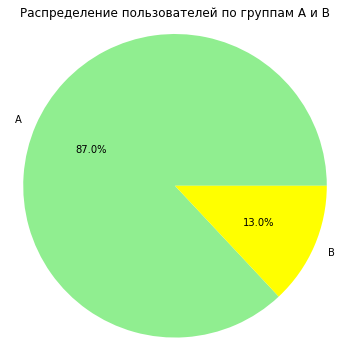

In [68]:
size_A = 100 * group_A['user_id'].count() / df_clear['user_id'].count()
size_B = 100 * group_B['user_id'].count() / df_clear['user_id'].count()

sizes = [size_A, size_B]
labels = ['A', 'B']
colors = ['lightgreen', 'yellow'] 

# Строим круговую диаграмму
plt.figure(figsize=(6, 6))  
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
autopct='%1.1f%%' #форматирует отображение процентов (один знак после запятой)
# startangle=140 - поворачивает диаграмму, чтобы первый сектор начинался под углом 140 градусов (необязательно)

plt.title('Распределение пользователей по группам A и B')
plt.axis('equal')  #  Обеспечивает, чтобы круговая диаграмма выглядела как круг, а не как эллипс.
plt.show()

Группа A в 6,6 раз больше группы B. Однако, балансировать наши группы не нужно, так как тест Манна-Уитни устойчив к разному размеру выборок, а у ttest для компенсации этого момента есть поправка Уэлча.

Среднее количество заказов на пользователя позволяет понять активность пользователя с того или иного типа устройства. С помощью описательной статистики изучим этот параметр.

In [69]:
# Описательные статистики пользователей мобильных устройств
group_A.describe()

,order_id
count,10872.000000
mean,2.866906
std,4.149541
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,123.000000


Максимальное значение (123) очень сильно отличается от 75-го процентиля (3). Из-за чего мы можем предположить, что данные имеют выбросы на высоких значениях. Проверим это, построив гистограмму распределения.

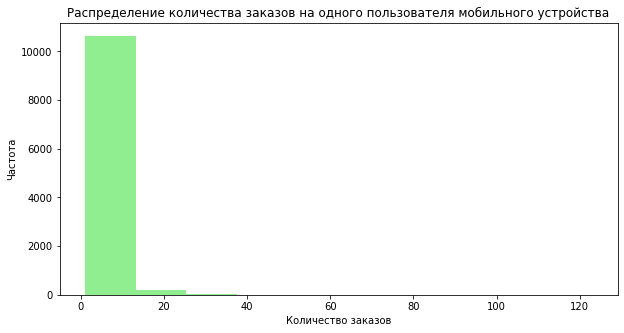

In [70]:
# Построим гистограмму распределения количества заказов на одного пользователя мобильного устройства
ax = group_A.plot.hist(figsize = (10, 5),color='lightgreen',legend=False)
ax.set_title('Распределение количества заказов на одного пользователя мобильного устройства')
ax.set_xlabel('Количество заказов')
ax.set_ylabel('Частота')
plt.show()

Гистограмма подтвердила наше предположении о наличии выбросов в данных. Избавляться мы от них не будем. Прежде проверим описательные статистики второй группы и распределение данных и после сможем принять решение о выборе статистического теста.

In [71]:
# Описательные статистики пользователей ПК
group_B.describe()

,order_id
count,1628.000000
mean,1.975430
std,3.071672
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,56.000000


У группы В мы также наблюдаем большую разницу между 75-м процентилем (2) и максимальным значением (56), значит скорее всего данные также содержат выбросы. Проверим это, построив гистограмму распределения.

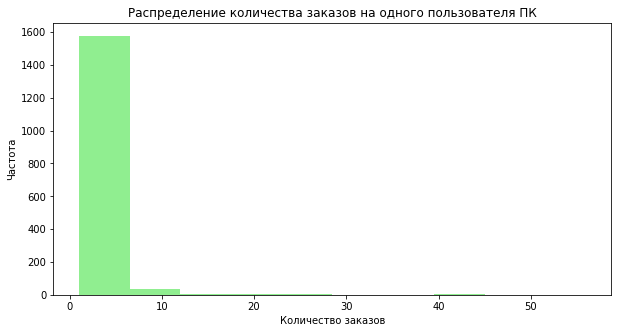

In [72]:
# Построим гистограмму распределения количества заказов на одного пользователя ПК
ax = group_B.plot.hist(figsize = (10, 5),color='lightgreen',legend=False)
ax.set_title('Распределение количества заказов на одного пользователя ПК')
ax.set_xlabel('Количество заказов')
ax.set_ylabel('Частота')
plt.show()

Гистограмма подтвердила наши предположения о возможных имеющихся выбросах. Также мы можем сделать вывод, что распределения наших групп не являются нормальными. В связи с имеющимися ограничениями для проверки гипотезы мы воспользуемся тестом Манна-Уитни.

In [73]:
metric_a = group_A['order_id']
metric_b = group_B['order_id']

# Уровень значимости
alpha = 0.05 

# Применяем тест Манна — Уитни
stat_mw, p_value_mw = mannwhitneyu(
    metric_a, 
    metric_b, 
    alternative = 'greater' # Альтернативная 
) 

if p_value_mw > alpha:
    display(f'pvalue={p_value_mw} > {alpha}')
    display('Нулевая гипотеза находит подтверждение!')
    display('Среднее количество заказов на одного пользователя мобильных устройств не больше, чем на одного пользователя стационарных компьютеров')
else:
    display(f'pvalue={p_value_mw} < {alpha}')
    display('Нулевая гипотеза не находит подтверждения!')
    display('Среднее количество заказов на одного пользователя мобильных устройств больше, чем на одного пользователя стационарных компьютеров')

'pvalue=2.4206332779240937e-39 < 0.05'

'Нулевая гипотеза не находит подтверждения!'

'Среднее количество заказов на одного пользователя мобильных устройств больше, чем на одного пользователя стационарных компьютеров'

В результате проведённого статистического теста мы получили следующий результат:
- Значение p_value < 0.05, а это значит, что нулевая гипотеза не находит подтверждения. Таким образом, среднее количество заказов на одного пользователя мобильных устройств больше, чем на одного пользователя стационарных компьютеров.



**Перейдём к проверке второй гипотезы.**
Для проверки нам также необходимо сравнить размеры групп, их статистики и распределение. После попробуем статистически доказать гипотезу, используя одностороннюю проверку гипотезы с двумя выборками.

Нулевая гипотеза $H_0: \mu_{\text{моб}} \leq \mu_{\text{ПК}}$ <br> Среднее время между заказами пользователей мобильных приложений не выше по сравнению с пользователями стационарных устройств.

Альтернативная гипотеза $H_1: \mu_{\text{моб}} > \mu_{\text{ПК}}$ <br> Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

Для проверки данной гипотезы нам понадобится поле `days_since_prev` с количеством дней с предыдущей покупки для каждого пользователя, однако в нём содержатся пропуски. Они находятся в строках с первыми заказами. Так как для проведения статистического теста недопустимо наличие пропусков, избавимся от них.

In [74]:
# Удалим строки с первыми заказами
df_autumn = df_autumn.dropna(subset = ['days_since_prev'])

In [75]:
# Подготовим выборки для проверки гипотезы
group_A = df_autumn[df_autumn['device_type_canonical'] == 'mobile'].groupby('user_id')['days_since_prev'].mean().reset_index()
group_B = df_autumn[df_autumn['device_type_canonical'] == 'desktop'].groupby('user_id')['days_since_prev'].mean().reset_index()

Проверим размеры наших выборок:

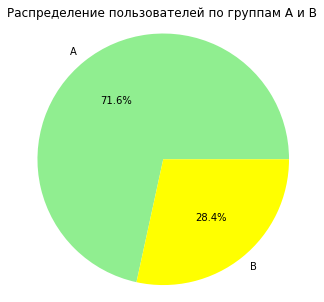

In [76]:
size_A = 100 * group_A['user_id'].count() / df_clear['user_id'].count()
size_B = 100 * group_B['user_id'].count() / df_clear['user_id'].count()

sizes = [size_A, size_B]
labels = ['A', 'B']
colors = ['lightgreen', 'yellow'] 

# Строим круговую диаграмму
plt.figure(figsize=(5, 5))  
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
autopct='%1.1f%%' #форматирует отображение процентов (один знак после запятой)
# startangle=140 - поворачивает диаграмму, чтобы первый сектор начинался под углом 140 градусов (необязательно)

plt.title('Распределение пользователей по группам A и B')
plt.axis('equal')  #  Обеспечивает, чтобы круговая диаграмма выглядела как круг, а не как эллипс.
plt.show()

Группа A в 2,5 раза больше группы B. Однако, балансировать наши группы не нужно, так как тест Манна-Уитни устойчив к разному размеру выборок, а у ttest для компенсации этого момента есть поправка Уэлча.

Среднее время между заказами пользователей позволяет понять активность пользователя с того или иного типа устройства. С помощью описательной статистики изучим этот параметр.

In [77]:
# Описательные статистики пользователей мобильных устройств
group_A.describe()

,days_since_prev
count,10151.000000
mean,20.559505
std,27.320211
min,0.000000
25%,2.039231
50%,9.500000
75%,27.666666
max,148.000000


Максимальное значение (148) очень сильно отличается от 75-го процентиля (27,6). Из-за чего мы можем предположить, что данные имеют выбросы на высоких значениях. Проверим это, построив гистограмму распределения.

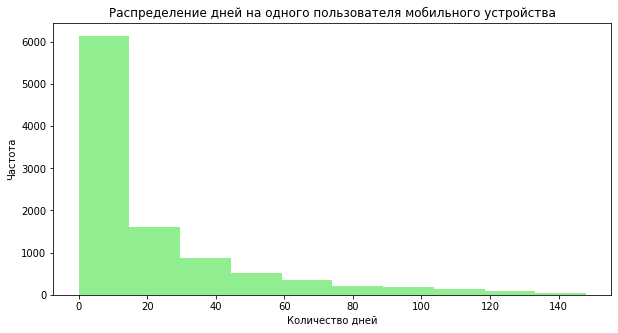

In [78]:
# Построим гистограмму распределения количества заказов на одного пользователя мобильного устройства
ax = group_A.plot.hist(figsize = (10, 5),color='lightgreen',legend=False)
ax.set_title('Распределение дней на одного пользователя мобильного устройства')
ax.set_xlabel('Количество дней')
ax.set_ylabel('Частота')
plt.show()

Гистограмма подтвердила наше предположении о наличии выбросов в данных. Избавляться мы от них не будем. Прежде проверим описательные статистики второй группы и распределение данных и после сможем принять решение о выборе статистического теста.

In [79]:
# Описательные статистики пользователей ПК
group_B.describe()

,days_since_prev
count,4029.000000
mean,14.872216
std,24.211456
min,0.000000
25%,1.000000
50%,4.500000
75%,17.000000
max,146.000000


Гистограмма подтвердила наши предположения о возможных имеющихся выбросах. Также мы можем сделать вывод, что распределения наших групп не являются нормальными. В связи с имеющимися ограничениями для проверки гипотезы мы воспользуемся тестом Манна-Уитни.

In [80]:
metric_a = group_A['days_since_prev']
metric_b = group_B['days_since_prev']

# Уровень значимости
alpha = 0.05 

# Применяем тест Манна — Уитни
stat_mw, p_value_mw = mannwhitneyu(
    metric_a, 
    metric_b, 
    alternative = 'greater' # Альтернативная 
) 

if p_value_mw > alpha:
    display(f'pvalue={p_value_mw} > {alpha}')
    display('Нулевая гипотеза находит подтверждение!')
    display('Среднее время между заказами пользователей мобильных приложений не выше, чем у пользователей стационарных устройств')
else:
    display(f'pvalue={p_value_mw} < {alpha}')
    display('Нулевая гипотеза не находит подтверждения!')
    display('Среднее время между заказами пользователей мобильных приложений выше, чем у пользователей стационарных устройств')

'pvalue=1.681999666825448e-51 < 0.05'

'Нулевая гипотеза не находит подтверждения!'

'Среднее время между заказами пользователей мобильных приложений выше, чем у пользователей стационарных устройств'

В результате проведённого статистического теста мы получили следующий результат:
- Значение p_value < 0.05, а это значит, что нулевая гипотеза не находит подтверждения. Таким образом, среднее время между заказами пользователей мобильных приложений выше, чем у пользователей стационарных устройств.

## 5. Общий вывод и рекомендации

Мы работали с тремя таблицами (`tickets_order_df`, `tickets_event_df`, `tickets_tenge_df`). В ходе предобработки мы:
- проверили данные на пропуски и убедились в их отсутствии (за исключением столбца `days_since_prev`);
- изучили и проверили на отсутсвие ошибок количественные и категориальные значения;
- избавились от явных и неявных дубликатов в данных;
- провели преобразования типов данных с понижением разрядности;
- а также создали 4 новых поля (`revenue_rub`, `one_ticket_revenue_rub`, `month`, `season`).

После предобработки мы провели исследовательский анализ, в результате которого получили:
- От июня к октябрю **кол-во заказов** стабильно растёт.
- Для категорий **театр**, **спорт** и **ёлки** наблюдается **увеличение** популярности с наступлением осени, а категорий концерт, стендап, выставки и другое наоборот с осень снижается спрос на посещение;
- Для типов устройств сезон практически никак не влияет на долю количества заказов. Для заказов, сделанных с мобильных устройств осенью есть незначительное снижение доли количества заказов по сравнению с летом, а для ПК - наоборот, с наступлением осени наблюдается незначительное увеличение доли заказов.
- Положительный тренд от лета к осени по доле заказов имеют только категории **12+** и **0+**. Остальные же категории уменьшают свои доли заказов от лета к осени.
- Только у 2 типов мероприятий из 7 выручка с продажи одного билета увеличилась с наступлением осени: для стендапа выручка выросла на **5,77%**, а для выставок на **5,98%**. Для всех остальных типов мероприятий мы наблюдаем снижение выручки на 9-18%. Самое больше изменение у типа мероприятий театр: выручка с продажи одного билета снизилась на 18,61%.
- Динамика общего числа заказов за осень 2024 г. от сентября к октябрю имеет положительный тренд.
- Динамика DAU за осень 2024 г. от сентября к октябрю растёт, хоть и скачкообразно. DAU от 01.09.2024 к 31.10.2024 выросло более чем на 700 пользователей, что является ещё одним подтверждением положительного тренда динамики DAU.
- Динамика среднего числа заказов на одного пользователя за осень 2024 г. от сентября к октябрю имеет положительный тренд.
- В начале и конце сентября были критически низкие цены на билеты, в связи с чем и возникла высокая активность пользователей, что привело к выбросам в динамике общего числа заказов и среднего числа заказов на пользователя соответственно.
- Пользовательская активность в будни выше, чем в выходные.
- 3 самых популярных по мероприятиям региона: Каменевский район с долей 26%, Североярская и Широковская области с долями 17 и 5% соответственно.
- Самым популярным партнёром стал "Лови билет" с долей в 20%. Вторым по популярности стал "Билеты без проблем" с долей в 16%, а третьим - "Билеты в руки". Остальные партнёры значительно менее популярны (доля проводимых мероприятий составляет 9% и ниже)

И в конце мы провели статистический анализ, в ходе которого были получены следующие результаты:
- Обе гипотезы ("Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств" и "среднее время между заказами пользователей мобильных приложений выше, чем у пользователей стационарных устройств") нашли своё подтверждение.

**Рекомендации:** учитывая то, что концерты и театры пользуются большим спросом, можно увеличить частоту их проведения. Для большей посещаемости мероприятий в выходные, возможно, стоит снизить стоимость билетов на них или же придумать акции для привлечения пользователей. В самых популярных регионах по количеству заказов билетов также можно увеличить частоту их проведения, чтобы получить ещё большую выручку. Пользователи стационарных компьютеров возвращаются к бронированию билетов с такой же периодичностью, что и пользователи мобильных устройств, но стоит подумать над тем, почему количество бронирований со стационарных компьютеров при этом меньше. Может быть стоит изменить интерфейс десктопной версии Яндекс Афиши, возможно существуют ограничения, чтобы делать сразу несколько заказов. 